# **Peramalan IHK Sulawesi Selatan dengan Metode Singular Spectrum Analysis (SSA) Menggunakan Python**

Referensi: 


*   https://www.kaggle.com/jdarcy/introducing-ssa-for-time-series-decomposition
*   https://github.com/kieferk/pymssa
*   Satriani, Nursalam, & Ibnas, R. (2020). Peramalan Indeks Harga Konsumen (IHK) di Sulawesi Selatan dengan Menggunakan Metode Singular Spectrum Analysis (SSA). Jurnal Matematika dan Statistika serta Aplikasinya, 81-89

In [ ]:
! git clone https://github.com/kieferk/pymssa
! python '/content/pymssa/setup.py' install

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pymssa.pymssa.mssa import MSSA

/content/pymssa/pymssa/mssa.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Input Data

Data yang akan dianalisis adalah data Indeks Harga Konsumen (IHK) yang diperoleh dari Publikasian Badan Pusat Statistik Provinsi Sulawesi Selatan, dengan periode data Januari Tahun 2014 sampai Desember Tahun 2019.

In [ ]:
# Input data IHK
from numpy import genfromtxt
F = genfromtxt('/content/dataIHK.csv', delimiter=',')

In [ ]:
# Rentang waktu
t = pd.date_range(start='1/1/2014', end='12/1/2019', freq='MS') 

## Plot Data

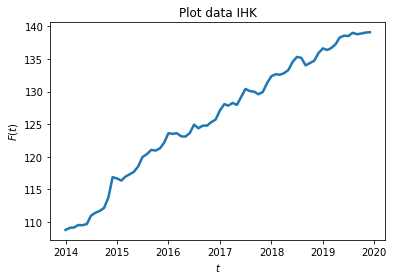

In [ ]:
# Plot data
plt.plot(t, F, lw=2.5)

plt.xlabel("$t$")
plt.ylabel("$F(t)$")
plt.title("Plot data IHK");

Berdasarkan plot terlihat pola data Indeks Harga Konsumen (IHK) dari Januari 2014 sampai Desember 2019 (72 bulan) memiliki pola data trend, karena dari plot data menunjukkan kecenderungan data indeks harga konsumen yang terus naik dari tahun ke tahun pada setiap bulannya

## **Tahap Peramalan dengan SSA**

### Tahap Dekomposisi

***Embedding***

In [ ]:
N = 72    # Jumlah data
L = 36    # Window Length
K = N - L + 1 # Ukuran kolom untuk matriks trajectory

# Membuat matriks trajectory berdasarkan data F
X = np.column_stack([F[i:i+L] for i in range(0,K)])
X

array([[108.81, 109.14, 109.17, ..., 125.33, 125.71, 127.12],
       [109.14, 109.17, 109.56, ..., 125.71, 127.12, 128.08],
       [109.17, 109.56, 109.53, ..., 127.12, 128.08, 127.84],
       ...,
       [124.78, 125.33, 125.71, ..., 138.99, 138.78, 138.88],
       [125.33, 125.71, 127.12, ..., 138.78, 138.88, 139.03],
       [125.71, 127.12, 128.08, ..., 138.88, 139.03, 139.08]])

In [ ]:
ssa = MSSA(n_components=None,
            window_size=L,
            verbose=True)

In [ ]:
# Fit data terhadap model
ssa.fit(F)

Constructing trajectory matrix
Trajectory matrix shape: (36, 37)
Decomposing trajectory covariance matrix with SVD
Constructing components


/content/pymssa/pymssa/optimized.py:233: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, A))
  L


Calculating optimal reconstruction orders


***Singular Value Decomposition (SVD)***

In [ ]:
ssa.left_singular_vectors_ # U

array([[ 0.1560131 ,  0.34877673,  0.29700222, ..., -0.06373896,
         0.04694016,  0.14295078],
       [ 0.15669775,  0.35773703,  0.21274827, ...,  0.2235675 ,
         0.14971011, -0.10451381],
       [ 0.15736007,  0.34845293, -0.00767823, ..., -0.16678564,
        -0.08364088,  0.16110142],
       ...,
       [ 0.17485814, -0.1300148 , -0.2422946 , ...,  0.46371071,
         0.18413045, -0.17310449],
       [ 0.17536015, -0.15938512, -0.12800176, ..., -0.14176549,
        -0.11797989,  0.47490458],
       [ 0.17584403, -0.18272081,  0.06463613, ..., -0.12415096,
         0.42909814, -0.14749309]])

In [ ]:
ssa.singular_values_ # Sigma

array([4.62043419e+03, 2.71192778e+01, 1.11336182e+01, 1.05564734e+01,
       9.17688292e+00, 7.47848067e+00, 7.17780260e+00, 5.86901485e+00,
       4.21069598e+00, 4.08531426e+00, 3.85005078e+00, 3.53569079e+00,
       2.97101873e+00, 2.94964710e+00, 2.56337919e+00, 2.40259301e+00,
       2.27017135e+00, 2.22291410e+00, 2.11847802e+00, 1.95949231e+00,
       1.87419752e+00, 1.63902429e+00, 1.63086845e+00, 1.54602518e+00,
       1.42295012e+00, 1.27100331e+00, 1.18470243e+00, 9.78635015e-01,
       9.39823894e-01, 9.29510728e-01, 7.65817199e-01, 7.31606421e-01,
       3.97743961e-01, 2.20526908e-01, 1.56883367e-01, 8.66089799e-02])

In [ ]:
U, Sigma, V = np.linalg.svd(X)
V = V.T

In [ ]:
V

array([[-0.15356825, -0.34450034, -0.3130721 , ...,  0.07898358,
        -0.00633814,  0.11134282],
       [-0.1542268 , -0.35147787, -0.22127873, ..., -0.18783384,
         0.11571366,  0.01229569],
       [-0.15490847, -0.34984248, -0.00888045, ...,  0.03878297,
        -0.12907619,  0.13862776],
       ...,
       [-0.17275984,  0.14318615,  0.11922606, ...,  0.17380916,
        -0.2403395 ,  0.40029144],
       [-0.17324938,  0.1675783 , -0.09197928, ...,  0.04175604,
         0.5168959 , -0.09381324],
       [-0.17372627,  0.18820307, -0.20089179, ..., -0.42159148,
        -0.22616939,  0.19556752]])

### Tahap Rekonstruksi

***Grouping***

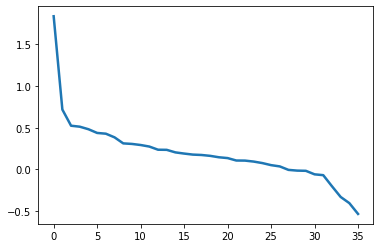

In [ ]:
plt.plot((np.log10(ssa.singular_values_**0.5)), lw=2.5)

Dapat dilihat bahwa nilai singular 𝑙1=67.9736413 (index 0) merupakan nilai terbesar yang berarti nilai singular dari 𝑙1 memberikan pengaruh terbesar dari komponen deret waktu terhadap karakteristik data dibandingkan dengan yang lainnya. Nilai singular selanjutnya cukup jauh berbeda dengan yang pertama dan cendereung menurun. Dari penurunan ini dapat diketahui dua hal yaitu komponen periodik dan noise.
Diketahui bahwa nilai singular mulai menurun secara lambat pada eigentriple 32 (index 31) sampai eigentriple 36 (index 35) sehingga  diidentifikasi sebagai komponen noise. 

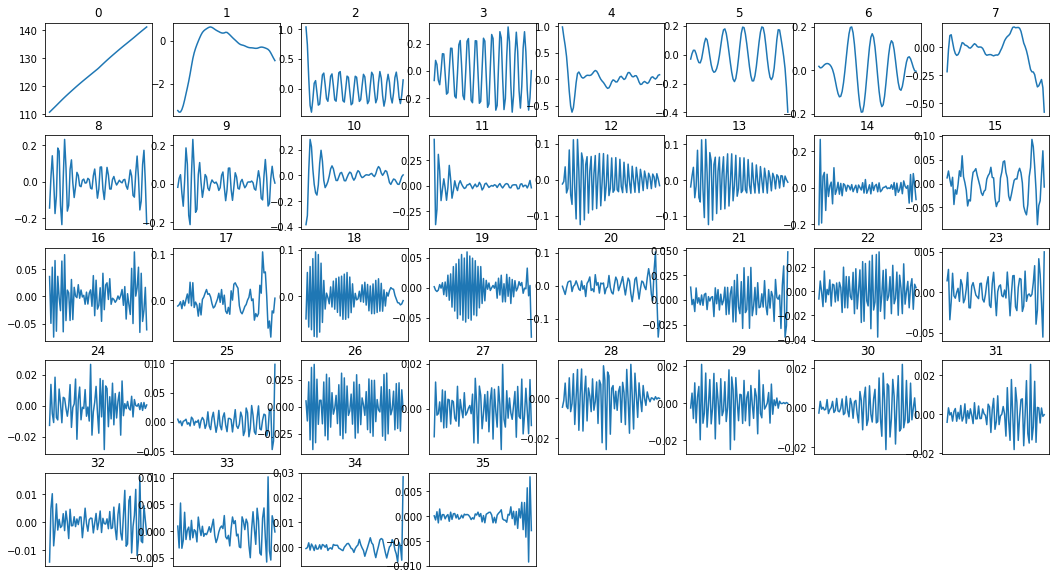

In [ ]:
fig = plt.figure(figsize=(18,10))
n=1
for i in range(0, 36):
    ax = fig.add_subplot(5,8,n)
    ax.plot(ssa.components_[0, :, i])
    ax.set_title(i)
    ax.set_xticks([])
    #ax.set_figsize(5,5)
    n += 1

Setiap nilai eigenvector di atas terlihat membentuk pola-pola tertentu. Hal ini memperlihatkan bahwa data Indeks Harga Konsumen di Sulawesi Selatan dari Januari 2014 sampai Desember 2019 melibatkan beberapa komponen aditif trend dan seasonality.

***Diagonal Averaging***

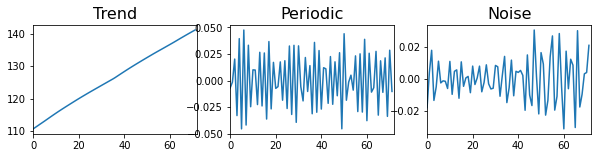

In [ ]:
# Pengumpulan grup komponen
F_trend = ssa.components_[0, :, 0]
F_periodic = ssa.components_[0, :, np.array([26,27])].sum(axis=0)
F_noise = ssa.components_[0, :,[i for i in range(31,36)]].sum(axis=0)

components = [("Trend", F_trend), 
              ("Periodic", F_periodic),
              ("Noise", F_noise)]

# Plot.
fig = plt.figure(figsize=(10, 2))
n=1
for name, ssa_comp in components:
    ax = fig.add_subplot(1,3,n)
    ax.plot(ssa_comp)
    ax.set_title(name, fontsize=16)
    ax.set_xlim(0,72)
    n += 1

*   Komponen Trend = eigentriple 1
*   Komponen Periodik/Seasonal = eigentriple 27 dan eigentriple 28
*   Komponen Noise = eigentriple 32, eigentriple 33, …, eigentriple 36.


## **Hasil Peramalan**

### **Hasil Peramalan Bulan Januari 2019 sampai Desember 2019**

In [ ]:
# Pengelompokan komponen
grup = np.array([0] + [26,27] + [i for i in range(31,36)])

# Hasil ramalan Januari 2019 - Desember 2019
ramalan = ssa.components_[0, :, grup].sum(axis=0)
ramalan[-12:]

array([136.63065366, 137.14184252, 137.48834348, 137.92438773,
       138.37299804, 138.68775857, 139.20512199, 139.53383775,
       139.97669271, 140.33403183, 140.79301282, 141.15895735])

Text(0, 0.5, 'IHK')

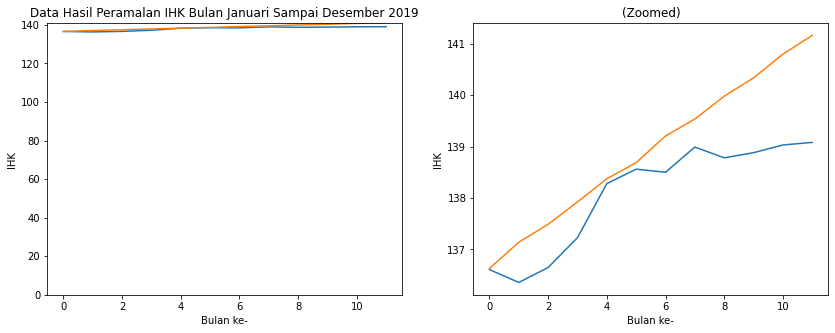

In [ ]:
# Plot hasil ramalan
fig, ax = plt.subplots(1, 2, figsize=(14,5))
ax[0].plot(F[-12:])
ax[0].plot(ramalan[-12:])
ax[0].set_title("Data Hasil Peramalan IHK Bulan Januari Sampai Desember 2019")
ax[0].set_ylim(0,141)
ax[0].set_xlabel("Bulan ke-")
ax[0].set_ylabel("IHK")

# Mengubah batas koordinat y agar visual lebih terlihat
ax[1].plot(F[-12:])
ax[1].plot(ramalan[-12:])
ax[1].set_title("(Zoomed)")
ax[1].set_xlabel("Bulan ke-")
ax[1].set_ylabel("IHK")

**Akurasi Peramalan**

In [ ]:
# Fungsi MAPE
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

# MAPE dari hasil ramalan
print(mape(F[-12:], ramalan[-12:]), '%')

0.6199977124364683 %


Berdasarkan nilai MAPE yang diperoleh pada tahapan akurasi peramalan didapatkan nilai MAPE sebesar 0.62% yang artinya kurang dari 10%, maka dapat disimpulkan bahwa metode peramalan dengan menggunakan metode Singular Spectrum Analysis (SSA) dengan window length sudah sangat baik untuk meramalkan Indeks Harga Konsumen di Sulawesi Selatan Januari Tahun 2014 sampai Desember Tahun 2019

### **Hasil Peramalan Januari sampai Desember 2020**

In [ ]:
ramalan2 = ssa.forecast(12, use_components=grup)
ramalan2

array([[142.13067663, 142.43759879, 143.02467923, 143.39392927,
        143.88611097, 144.2478048 , 144.72903126, 145.24085682,
        145.73116529, 146.18643466, 146.59936837, 147.05287268]])